# Reading The Data
- Using pynwb

In [2]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count

# Exploring functionalies of nwb module

In [3]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("../M440956/sub-440956_ses-20190208T133600_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

# nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

In [4]:
nwbfile.subject

subject pynwb.file.Subject at 0x2197500892784
Fields:
  age__reference: birth
  date_of_birth: 2018-10-09 00:00:00-05:00
  description: SC015
  sex: M
  species: Mus musculus
  subject_id: 440956

In [13]:
import glob
nwb_files = glob.glob("..\M440956\*.nwb")
nwb_io = []

for name in nwb_files:
    io = NWBHDF5IO(name, mode="r").read()
    nwb_io.append(io)
    
trials_df = []
for i in range(len(nwb_files)):
    trials_df.append(nwb_io[i].trials.to_dataframe().drop(['trial','task','trial_uid', 'photostim_power','photostim_duration','auto_water', 'free_water'],axis=1))
    trials_df[i]['ses_no'] = i+1

In [14]:
trials_df[1]

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no
id,,,,,,,,
0,0.0000,5.0097,N/A,1,right,no early,hit,2
1,8.1746,13.1813,N/A,1,right,no early,hit,2
2,14.9698,19.7441,N/A,1,right,no early,hit,2
3,22.2958,27.1855,N/A,1,right,no early,hit,2
4,29.0118,34.4933,N/A,1,left,early,miss,2
...,...,...,...,...,...,...,...,...
475,3675.0971,3679.9248,N/A,1,right,no early,hit,2
476,3682.5639,3687.4412,N/A,1,right,no early,hit,2
477,3690.0865,3694.8972,1.885,1,left,no early,hit,2


In [15]:
units_df = []
for i in range(len(nwb_files)):
    units_df.append(nwb_io[i].units.to_dataframe().query("classification == 'good'").reset_index())
    units_df[i]['ses_no'] = i+1

In [16]:
units_df[2]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no
0,12,12,30000,good,43.0,100.0,100.250723,3.031763,0.004735,40.38540,...,good,"Globus pallidus, external segment","[True, True, True, True, True, True, True, Tru...","[0.24220153844200532, 1.275346500062949, 1.317...","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",l...,18005118502 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.013644366197183, 1.1034959758551306, 0.1862...",[nan],3
1,14,14,30000,good,59.0,120.0,98.039062,3.171259,0.010571,24.60130,...,good,"Globus pallidus, external segment","[True, True, True, True, True, True, True, Tru...","[0.06933292609877073, 0.13093361942894788, 0.1...","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",l...,18005118502 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.03515625, -0.2953125, -0.403125, -0.372656...",[nan],3
2,35,37,30000,good,43.0,180.0,108.499906,3.148037,0.005433,16.27810,...,good,"Globus pallidus, external segment","[True, True, True, True, True, True, True, Tru...","[0.008732244023954117, 0.03933258843797027, 0....","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",l...,18005118502 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.87743993993994, -0.7343280780780781, -0.40...",[nan],3
3,36,38,30000,good,59.0,160.0,90.990991,2.717258,0.005529,74.22780,...,good,"Globus pallidus, external segment","[True, True, True, True, True, True, True, Tru...","[0.0015321629853617402, 0.01036559574104201, 0...","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",l...,18005118502 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.1114864864864864, 1.6422672672672673, 1.137...",[nan],3
4,37,39,30000,good,11.0,180.0,137.913821,3.802340,0.000000,1.16347,...,good,"Globus pallidus, external segment","[True, True, True, True, True, True, True, Tru...","[0.046099331265906596, 0.04926603357454651, 0....","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",l...,18005118502 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.03896971496437055, -0.46485302850356297, -0...",[nan],3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1047,396,30000,good,59.0,3560.0,133.312796,3.169841,0.056549,3.94183,...,good,"Primary somatosensory area, lower limb, layer 5","[True, True, True, True, True, True, True, Tru...","[0.2501798847490462, 0.26287997543870034, 0.31...","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.6709384858044163, 1.6512223974763407, 1.441...",[nan],3
176,1050,399,30000,good,43.0,3580.0,133.493406,3.522125,0.000000,1.08442,...,good,"Primary somatosensory area, lower limb, layer 5","[True, True, True, True, True, True, True, Tru...","[2.6028966851860225, 3.8028719207158495, 60.09...","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.4969418960244648, -0.28908639143730885, -0....",[nan],3
177,1070,419,30000,good,43.0,3660.0,193.166209,5.924859,0.000000,2.26172,...,good,"Primary somatosensory area, lower limb, layer 5","[True, True, True, True, True, True, True, Tru...","[12.038935108089403, 12.04206846379761, 12.206...","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.5279876373626373, -0.18028846153846154, -0....",[nan],3
178,1123,472,30000,good,27.0,960.0,223.996884,5.161196,0.039407,31.26490,...,good,Reticular nucleus of the thalamus,"[True, True, True, True, True, True, True, Tru...","[0.0011114395178215553, 0.04231173372362873, 0...","[[0.0, 4.8566], [8.7569, 13.5793], [15.3683, 2...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[3.528606495468278, 2.8252454682779455, 2.0510...",[nan],3


# Data Cleaning

In [17]:
import ast

In [18]:
units_df[2].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

left Striatum     98
right Striatum    82
Name: electrodes, dtype: int64

In [19]:
units_df[2]['anno_name'].unique()

array(['Globus pallidus, external segment', 'Striatum', 'Caudoputamen',
       'Primary somatosensory area, upper limb, layer 6a',
       'Primary somatosensory area, upper limb, layer 5',
       'Primary somatosensory area, lower limb, layer 5',
       'Primary somatosensory area, lower limb, layer 4',
       'Reticular nucleus of the thalamus'], dtype=object)

## Making Data Useable

In [11]:
pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = [],[],[],[],[],[],[],[]
for name in nwb_files:  
    with NWBHDF5IO(name, "r") as io:
        read_nwbfile = io.read()
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_start_times"].timestamps[:4])
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_stop_times"].timestamps[:4])
        pre_start.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:])
        pre_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:])
        sample_start.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:])
        sample_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:])
        delay_start.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:])
        delay_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:])
        go_start.append(read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:])
        go_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:])
    
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
    for i in range(len(pre_start)):
        sample_start[i] = np.intersect1d(pre_stop[i], sample_start[i])
        sample_stop[i] = np.intersect1d(sample_stop[i], delay_start[i])
        delay_start[i] = np.intersect1d(delay_start[i], sample_stop[i])
        delay_stop[i] = np.intersect1d(delay_stop[i], go_start[i])
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

In [12]:
len(delay_start[2])

518

In [14]:
for i in range(len(nwb_files)):
    trials_df[i] = trials_df[i].assign(pre_start = pre_start[i],
                             pre_stop = pre_stop[i],
                             sample_start = sample_start[i],
                             sample_stop = sample_stop[i],
                             delay_start = delay_start[i],
                             delay_stop = delay_stop[i],
                             go_start = go_start[i],
                             go_stop = go_stop[i])
    units_df[i]['Region'] = units_df[i].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])
units_df[3]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
0,1,1,30000,good,27.0,0.0,213.967472,4.124510,0.038866,7.141810,...,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.06404618397708761, 0.0950796867016237, 0.10...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",l...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.2034109257265877, 1.1907965554359528, 1.657...",[nan],4,left ALM
1,3,3,30000,good,27.0,0.0,313.877593,7.899595,0.013811,12.956400,...,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.0025791818030342917, 0.028245988567687785, ...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",l...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.4384285348360657, 1.1118404200819672, 0.677...",[nan],4,left ALM
2,8,8,30000,good,59.0,0.0,264.130663,4.429599,0.023455,4.995560,...,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.28164737171690435, 0.4273148334851329, 0.68...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",l...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[6.234270134228188, 5.982592281879195, 6.15037...",[nan],4,left ALM
3,15,15,30000,good,27.0,40.0,136.942660,2.715889,0.065716,8.072710,...,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.014245912150604223, 0.06647953059243816, 0....","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",l...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[3.0641549844236757, 3.7602219626168223, 3.842...",[nan],4,left ALM
4,18,19,30000,good,11.0,60.0,167.586419,3.767756,0.031068,18.657900,...,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.0026791823488707678, 0.010679226015775534, ...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",l...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[0.2820083417593529, -0.09716253791708797, -0....",[nan],4,left ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,1952,696,30000,good,11.0,1860.0,117.870644,3.687613,0.000000,3.638310,...,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.0484839291867174, 0.25721999927953965, 0.39...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.9909634216589862, 0.6966445852534562, 0.977...",[nan],4,right Striatum
521,1956,700,30000,good,43.0,1980.0,251.577787,9.583924,0.054613,15.606400,...,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.0273836525388802, 0.16381877468674366, 0.18...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.762036560247168, 1.6437628733264675, 1.6944...",[nan],4,right Striatum
522,1968,712,30000,good,27.0,3200.0,161.814413,5.849327,0.000000,0.752682,...,"Primary somatosensory area, upper limb, layer 6a","[True, True, True, True, True, True, True, Tru...","[9.919617099393504, 9.950750840924437, 31.9197...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.921961966604824, 1.4610389610389611, 1.0783...",[nan],4,right Striatum
523,1980,725,30000,good,43.0,3500.0,104.399326,2.897750,0.032115,3.501330,...,"Primary somatosensory area, upper limb, layer 5","[True, True, True, True, True, True, True, Tru...","[0.2687201500591665, 1.2547330777732628, 1.261...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.8364520958083832, 0.47717065868263475, 0.01...",[nan],4,right Striatum


In [15]:
#Aggregating Data
trial_result = pd.DataFrame()
unit_result = pd.DataFrame()
for i in range(len(nwb_files)):
    trial_result = pd.concat([trial_result, trials_df[i]])
    unit_result = pd.concat([unit_result, units_df[i]])
trial_result

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
0,0.0000,4.8615,N/A,1,right,no early,ignore,1,0.5000,1.2115,1.2115,1.8615,1.8615,3.0615,3.0615,4.5615
1,6.6536,12.2911,N/A,1,right,early,ignore,1,7.1536,7.8919,7.8919,9.2911,9.2911,10.4911,10.4911,11.9911
2,14.0799,20.0728,N/A,1,right,no early,hit,1,14.5799,15.4514,15.4514,16.1014,16.1014,17.3014,17.3014,18.8014
3,24.0631,29.1689,N/A,1,right,no early,hit,1,24.5631,25.3602,25.3602,26.0102,26.0102,27.2102,27.2102,28.7102
4,31.1768,37.0372,N/A,1,right,early,ignore,1,31.6768,32.4794,32.4794,34.0372,34.0372,35.2372,35.2372,36.7372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,6666.6268,6670.4946,N/A,1,right,no early,miss,4,6667.1268,6667.9383,6667.9383,6668.5883,6668.5883,6669.7883,6669.7883,6671.2883
578,6672.8794,6677.7494,N/A,1,right,no early,ignore,4,6673.3794,6674.0994,6674.0994,6674.7494,6674.7494,6675.9494,6675.9494,6677.4494
579,6680.1241,6684.9965,1.832,1,right,no early,hit,4,6680.6241,6681.3060,6681.3060,6681.9560,6681.9560,6683.1560,6683.1560,6684.6560


In [16]:
units_df_ag = unit_result
trials_df_ag = trial_result

## Spike Rate Plotting

In [17]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'right ALM' and classification == 'good'")

In [18]:
units_Data

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
175,677,4,30000,good,59.0,0.0,122.960201,4.216014,0.000000,3.161470,...,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.6299738948925833, 1.0984455911182276, 1.398...","[[0.0, 4.8615], [6.6536, 12.2911], [14.0799, 2...",...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[-1.0567059270516717, -0.8144946808510638, -0....",[nan],1,right ALM
176,679,7,30000,good,27.0,40.0,376.024798,12.949061,0.000000,23.733900,...,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.012833935882935688, 0.02893410873600155, 0....","[[0.0, 4.8615], [6.6536, 12.2911], [14.0799, 2...",...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[2.9344319331983804, 2.2085336538461537, 2.222...",[nan],1,right ALM
177,683,11,30000,good,11.0,60.0,96.877353,2.951434,0.017345,4.383770,...,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.23643633650066898, 0.24626977540678574, 0.2...","[[0.0, 4.8615], [6.6536, 12.2911], [14.0799, 2...",...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[-0.6306475903614458, -0.7247740963855422, -0....",[nan],1,right ALM
178,686,14,30000,good,59.0,80.0,352.760295,11.270142,0.000000,1.031660,...,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.054267714053454874, 0.28393684647089446, 0....","[[0.0, 4.8615], [6.6536, 12.2911], [14.0799, 2...",...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[4.043582654249127, 2.98493888242142, 1.661634...",[nan],1,right ALM
179,687,15,30000,good,11.0,100.0,87.284645,3.155331,0.028969,2.786210,...,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.044000937161645215, 0.6228738186654548, 0.7...","[[0.0, 4.8615], [6.6536, 12.2911], [14.0799, 2...",...,17216703352 1-281 pynwb.ecephys.ElectrodeGroup...,"[2.7870347082494966, 2.737518863179074, 3.0251...",[nan],1,right ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1090,504,30000,good,59.0,1000.0,76.668432,2.654827,0.000000,0.371103,...,"Orbital area, lateral part, layer 6a","[True, True, True, True, True, True, True, Tru...","[3.694932577981422, 8.91651941871639, 11.30993...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.4124293785310735, 1.2226341807909604, 1.037...",[nan],4,right ALM
310,1092,506,30000,good,43.0,1020.0,80.428188,2.863333,0.000000,0.619204,...,"Orbital area, lateral part, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.3285450116586146, 9.665690736488322, 9.9465...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.0554810948081264, 1.2221360045146727, 0.711...",[nan],4,right ALM
311,1096,510,30000,good,11.0,1180.0,72.733813,2.652626,0.099776,1.456460,...,"Orbital area, lateral part, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.09571023280936242, 0.09747691044415285, 0.1...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.0690197841726619, 0.5092176258992805, 0.266...",[nan],4,right ALM
312,1097,511,30000,good,43.0,1540.0,74.019407,3.374872,0.000000,0.745001,...,"Secondary motor area, layer 6a","[True, True, True, True, True, True, True, Tru...","[2.1799565058383075, 2.831893886616213, 3.0498...","[[0.0, 5.6166], [7.406, 12.9615], [17.8776, 22...",...,17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.9787757973733584, 2.123886022514071, 1.6621...",[nan],4,right ALM


# New data based on Delay range [1.0,1.2]




In [19]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")
trials_Data

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
3,24.0631,29.1689,N/A,1,right,no early,hit,1,24.5631,25.3602,25.3602,26.0102,26.0102,27.2102,27.2102,28.7102
8,60.1410,65.1748,N/A,1,right,no early,hit,1,60.6410,61.3605,61.3605,62.0105,62.0105,63.2105,63.2105,64.7105
25,173.7197,178.9643,N/A,1,left,no early,hit,1,174.2197,174.9517,174.9517,175.6017,175.6017,176.8017,176.8017,178.3017
27,190.8164,195.7693,N/A,1,left,no early,hit,1,191.3164,192.0574,192.0574,192.7074,192.7074,193.9074,193.9074,195.4074
32,224.4209,229.2842,N/A,1,left,no early,hit,1,224.9209,225.6153,225.6153,226.2653,226.2653,227.4653,227.4653,228.9653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,6473.8762,6478.8005,N/A,1,left,no early,hit,4,6474.3762,6475.2193,6475.2193,6475.8693,6475.8693,6477.0693,6477.0693,6478.5693
565,6581.4367,6586.1812,N/A,1,right,no early,hit,4,6581.9367,6582.6572,6582.6572,6583.3072,6583.3072,6584.5072,6584.5072,6586.0072
573,6637.2332,6642.1858,N/A,1,left,no early,hit,4,6637.7332,6638.5969,6638.5969,6639.2469,6639.2469,6640.4469,6640.4469,6641.9469


# Plotting with phases

In [20]:
def get_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    #plt.plot(edges[1:],freq)
    
    #return freq,edges[1:],smooth_gauss
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

In [21]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

# def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
#     after = 4.35
#     before = -0.7
#     spike_data = []
    
#     for unit in units_Data.reset_index()['id'][:20]:
#         unit_spike_times = units_Data["spike_times"][unit]
#         trial_spikes_l = []
#         trial_spikes_r = []
#         i = 0
#         for time in Trial_Data1['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes1 = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
#             aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
#             trial_spikes_l.append(aligned_spikes1)
            
#         for time in Trial_Data2['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes = aligned_spikes[aligned_spikes < after ]
#             aligned_spikes = aligned_spikes[before < aligned_spikes]
#             trial_spikes_r.append(aligned_spikes)            
            
#         fig, axs = plt.subplots(1, 1, sharex="all")
        
        
#         plt.xlabel("time (s)")
        
#         get_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
#         get_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
#         axs.set_ylabel("Freq (Hz)")
#         axs.axvline(0, color=[0.5, 0.5, 0.5])
#         axs.axvline(0.65, color=[0.5, 0.5, 0.5])
#         axs.axvline(1.85, color=[0.5, 0.5, 0.5])
#         axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
#         axs.text(0.1,0,'Sample',rotation=90)
#         axs.text(0.75,0,'Delay',rotation=90)
#         axs.text(1.95,0,'Go',rotation=90)
#         axs.text(-0.4,0,'Pre-Sample',rotation=90)
# get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [22]:
len(trials_Data_L),len(trials_Data_R)

(564, 574)

In [23]:
def get_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for session in range(1,len(nwb_files)+1):
        temp_data_l = Trial_Data1.query("ses_no == @session") 
        temp_data_r = Trial_Data2.query("ses_no == @session") 
        temp_unit = units_Data.query("ses_no == @session")
        for unit in temp_unit.reset_index()['index']:
            unit_spike_times = temp_unit["spike_times"][unit]
            trial_spikes_l = []
            trial_spikes_r = []
            i = 0
            for time in temp_data_l['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_l.append(aligned_spikes)

            frq_l,edge,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,temp_data_l)    
            spike_data_l.append(smooth_l)

            for time in temp_data_r['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_r.append(aligned_spikes)

            frq_r,edge,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,temp_data_r)    
            spike_data_r.append(smooth_r)    
        
    return spike_data_l,spike_data_r,edge

l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

In [ ]:
# avg_left_rate = np.array(l).mean(axis=0)
# avg_right_rate = np.array(r).mean(axis=0)


# fig, axs = plt.subplots(1, 1, sharex="all")
# axs.plot(edges,avg_left_rate,c='r')
# axs.plot(edges,avg_right_rate,c='b')
# axs.axvline(0, color=[0.5, 0.5, 0.5])
# axs.axvline(0.65, color=[0.5, 0.5, 0.5])
# axs.axvline(1.85, color=[0.5, 0.5, 0.5])
# axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,0,'Sample',rotation=90)
# axs.text(0.75,0,'Delay',rotation=90)
# axs.text(1.95,0,'Go',rotation=90)
# axs.text(-0.4,0,'Pre-Sample',rotation=90)
# axs.set_ylabel("Freq (Hz)")
# axs.legend(['Left','Right'])
# plt.show()

In [34]:
edges[569:690]

array([1.85 , 1.855, 1.86 , 1.865, 1.87 , 1.875, 1.88 , 1.885, 1.89 ,
       1.895, 1.9  , 1.905, 1.91 , 1.915, 1.92 , 1.925, 1.93 , 1.935,
       1.94 , 1.945, 1.95 , 1.955, 1.96 , 1.965, 1.97 , 1.975, 1.98 ,
       1.985, 1.99 , 1.995, 2.   , 2.005, 2.01 , 2.015, 2.02 , 2.025,
       2.03 , 2.035, 2.04 , 2.045, 2.05 , 2.055, 2.06 , 2.065, 2.07 ,
       2.075, 2.08 , 2.085, 2.09 , 2.095, 2.1  , 2.105, 2.11 , 2.115,
       2.12 , 2.125, 2.13 , 2.135, 2.14 , 2.145, 2.15 , 2.155, 2.16 ,
       2.165, 2.17 , 2.175, 2.18 , 2.185, 2.19 , 2.195, 2.2  , 2.205,
       2.21 , 2.215, 2.22 , 2.225, 2.23 , 2.235, 2.24 , 2.245, 2.25 ,
       2.255, 2.26 , 2.265, 2.27 , 2.275, 2.28 , 2.285, 2.29 , 2.295,
       2.3  , 2.305, 2.31 , 2.315, 2.32 , 2.325, 2.33 , 2.335, 2.34 ,
       2.345, 2.35 , 2.355, 2.36 , 2.365, 2.37 , 2.375, 2.38 , 2.385,
       2.39 , 2.395, 2.4  , 2.405, 2.41 , 2.415, 2.42 , 2.425, 2.43 ,
       2.435, 2.44 , 2.445, 2.45 ])

In [35]:
diff_cd = (-np.array(l)+np.array(r))

delay_avg_diff = diff_cd[:,449:570].mean(axis=1)
response_avg_diff = diff_cd[:,569:690].mean(axis=1)

newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)

In [39]:
#Delay period CD Apply (Yet to finish)    (**FINISHED**)
# diff_cd = (np.array(l)-np.array(r)).mean(axis=1)
# newly_l = np.array(l).T.dot(diff_cd)
# newly_r = np.array(r).T.dot(diff_cd)

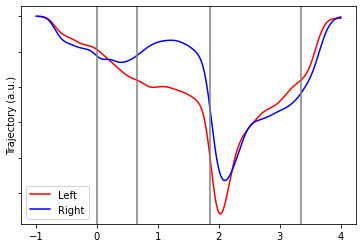

In [37]:
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# For Striatum

In [40]:
units_df_ag['Region'].unique()

array(['left ALM', 'right ALM', 'left Striatum', 'right Striatum'],
      dtype=object)

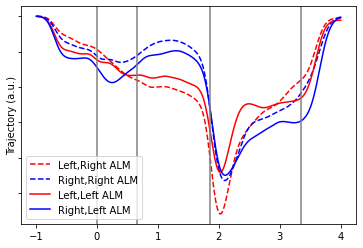

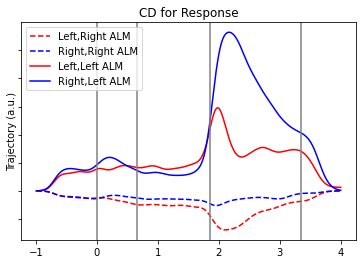

In [41]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'left ALM' and classification == 'good'")

trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

st_l,st_r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

diff_cd = (-np.array(st_l)+np.array(st_r))
delay_avg_diff_lalm = diff_cd[:,449:569].mean(axis=1)
response_avg_diff_lalm = diff_cd[:,569:690].mean(axis=1)
newly_l_st = np.array(st_l).T.dot(delay_avg_diff_lalm)
newly_r_st = np.array(st_r).T.dot(delay_avg_diff_lalm)

fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,Right ALM','Right,Right ALM','Left,Left ALM','Right,Left ALM'])
plt.show()

newly_l_st = np.array(st_l).T.dot(response_avg_diff_lalm)
newly_r_st = np.array(st_r).T.dot(response_avg_diff_lalm)
newly_l = np.array(l).T.dot(response_avg_diff)
newly_r = np.array(r).T.dot(response_avg_diff)

fig, axs = plt.subplots(1, 1, sharex="all")
plt.title('CD for Response')
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,Right ALM','Right,Right ALM','Left,Left ALM','Right,Left ALM'])
plt.show()

In [45]:
from numpy import arccos, array
from numpy.linalg import norm
import math
def angles(u, v): 
    return arccos(u.dot(v)/(norm(u)*norm(v)))
print(math.degrees(angles(delay_avg_diff, response_avg_diff)), math.degrees(angles(delay_avg_diff_lalm, response_avg_diff_lalm)))

70.5613306609712 102.79141422921333


# Distribution during delay and go phase

In [30]:
def get_phases_rate_graph(Trial_Data1,Trial_Data2,sigma):

    spike_data = []
    
    for unit in units_Data.reset_index().id:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_go_l = []
        trial_spikes_go_r = []
        trial_spikes_delay_l = []
        trial_spikes_delay_r = []
        trial_sample_l = []
        trial_sample_r = []
        
    
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_l.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_l.append(aligned_spikes1)
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_r.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_r.append(aligned_spikes1)        
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_r.append(aligned_spikes1)   
              
    return trial_sample_l, trial_sample_r, trial_spikes_go_l,trial_spikes_go_r,trial_spikes_delay_l,trial_spikes_delay_r     

def get_freq_edge(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(31)/20) + 1.80)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_1(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(25)/20) + 0.60)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_2(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(14)/20) + 0)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]


sample_l, sample_r, go_l,go_r,delay_l,delay_r = get_phases_rate_graph(trials_Data_L,trials_Data_R,0.1)
freq_sample_l,edges2 = get_freq_edge_2(sample_l,trials_Data_L)
freq_sample_r,edges2 = get_freq_edge_2(sample_r,trials_Data_R)
freq_go_l,edges = get_freq_edge(go_l,trials_Data_L)
freq_go_r,edges = get_freq_edge(go_r,trials_Data_R)
freq_delay_l,edges1 = get_freq_edge_1(delay_l,trials_Data_L)
freq_delay_r,edges1 = get_freq_edge_1(delay_r,trials_Data_R)

<AxesSubplot:ylabel='Density'>

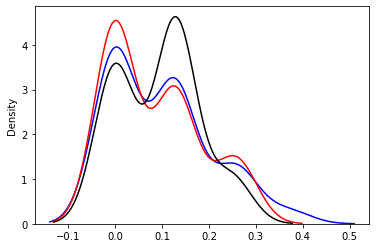

In [31]:
#Delay vs Go(Phases vs Phases)(Yet to finish)
sns.kdeplot(list(freq_go_l) + list(freq_go_r), c='b')
sns.kdeplot(list(freq_delay_l) + list(freq_delay_r), c='r')
sns.kdeplot(list(freq_sample_l) + list(freq_sample_r), c='black')

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.        , 0.01234568, 0.02469136, 0.03703704, 0.04938272,
        0.0617284 , 0.07407407, 0.08641975, 0.09876543, 0.11111111,
        0.12345679, 0.13580247, 0.14814815, 0.16049383, 0.17283951,
        0.18518519, 0.19753086, 0.20987654, 0.22222222, 0.2345679 ,
        0.24691358]),
 <BarContainer object of 20 artists>)

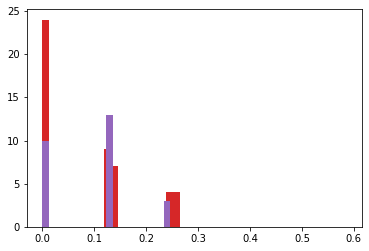

In [32]:
plt.hist(list(freq_go_r) + list(freq_go_l), bins=20)
plt.hist(list(freq_delay_r) + list(freq_delay_l), bins=20)
plt.hist(list(freq_sample_r) + list(freq_sample_l), bins=20)